+-----+------------+---------------+---------+----------+------------+-----------+
|   i |   X_i(i-1) |   f(X_i(i-1)) |     X_i |   f(X_i) |   X_i(i+1) | e_a (%)   |
+=====+============+===============+=========+==========+============+===========+
|   0 |    -1.0000 |      -11.5000 |  0.0000 |   2.0000 |    -0.1481 | N/A       |
+-----+------------+---------------+---------+----------+------------+-----------+
|   1 |     0.0000 |        2.0000 | -0.1481 |   0.5178 |    -0.1999 | 25.888740 |
+-----+------------+---------------+---------+----------+------------+-----------+
|   2 |    -0.1481 |        0.5178 | -0.1999 |  -0.0015 |    -0.1997 | 0.075800  |
+-----+------------+---------------+---------+----------+------------+-----------+
The Root is Approximately: -0.1999
Number of iterations: 3


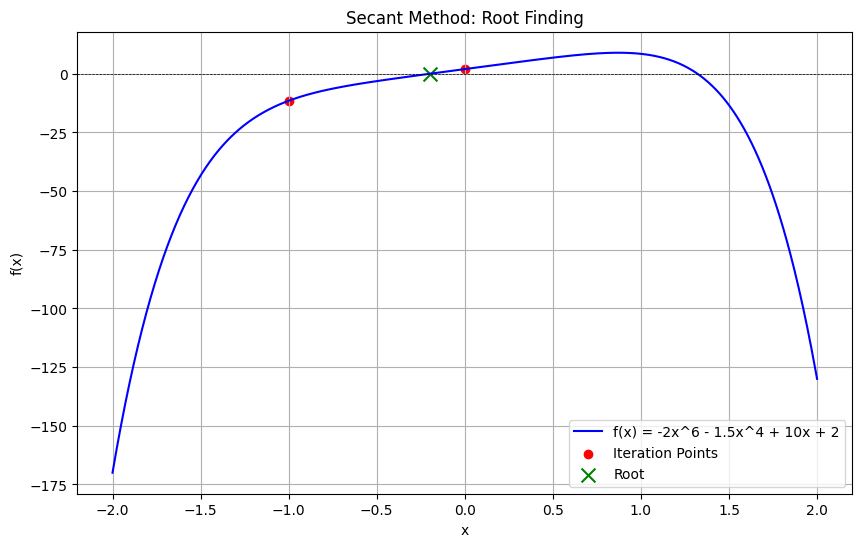

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

def f(x):
    return (-2 * x ** 6) - (1.5 * x ** 4) + (10 * x) + 2

xi_minus_1 = float(input("Enter the First Initial Guess (x_i-1): "))
xi = float(input("Enter the Second Initial Gues (x_i): "))

# Initializes the variables of the method.
max_iter = 100
error = 100  
iter = 0
table_data = []
x_vals = [xi_minus_1, xi]
f_vals = [f(xi_minus_1), f(xi)]

# Calculations.
while iter < max_iter:
    xi_plus_1 = xi - (f(xi) * (xi_minus_1 - xi)) / (f(xi_minus_1) - f(xi))
    
    if iter > 0:
        error = abs((xi_plus_1 - xi) / xi_plus_1) * 100
    else:
        error = np.nan  
        
    if iter == 0:
        table_data.append([iter, xi_minus_1, f(xi_minus_1), xi, f(xi), xi_plus_1, "N/A"])
    else:
        table_data.append([iter, xi_minus_1, f(xi_minus_1), xi, f(xi), xi_plus_1, f"{error:.6f}"])
        
    if iter > 0 and error < 5:
        break
        
    xi_minus_1 = xi
    xi = xi_plus_1
    iter += 1

# Prints the results.
headers = ["i", "X_i(i-1)", "f(X_i(i-1))", "X_i", "f(X_i)", "X_i(i+1)", "e_a (%)"]
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".4f"))

print(f"The Root is Approximately: {xi:.4f}")
print(f"Number of iterations: {iter + 1}")

x = np.linspace(-2, 2, 1000) 
y = f(x)  

# Plots the method itself.
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = -2x^6 - 1.5x^4 + 10x + 2", color="blue")  
plt.scatter(x_vals, f_vals, color="red", label="Iteration Points")  

# Highlights the roots.
plt.scatter(xi_plus_1, f(xi_plus_1), color="green", label="Root", marker="x", s=100)  
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)  

# Adds titles, labels, legends, and window title.
plt.gcf().canvas.manager.set_window_title("Secant Method | Function Plot")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Secant Method: Root Finding")
plt.legend()
plt.grid()
plt.show()